# Task 2
Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Step 2: Load the Titanic dataset
data = pd.read_csv('titanic.csv')

In [9]:
# Step 3: Examine the first few rows of the dataset
print(data.head())  # Show the first 5 rows
print(data.info())  # Display basic info about the dataset
print(data.describe())  # Summary statistics for numerical columns


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [10]:
# Step 4: Data Cleaning

# Check for missing values
print(data.isnull().sum())

# Handle missing values
# For categorical columns, fill missing values with the mode (most frequent value)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# For numerical columns, fill missing values with the median (Age, Fare)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# If 'Cabin' column has too many missing values, drop it
data.drop(columns=['Cabin'], inplace=True)

# Convert 'Sex' column to numeric (0: Male, 1: Female) for analysis
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Check if there are any other missing values after filling
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/var/folders/1p/kgw_81px61jcrqrrnfwt7tq40000gn/T/ipykernel_2643/1152334849.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
/var/folders/1p/kgw_81px61jcrqrrnfwt7tq40000gn/T/ipykernel_2643/1152334849.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.486592    0.836071    0.477990   13.019697   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    0.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare  
count  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208  
std      1.102743    0.806057   49.693429  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400  
50%      0.000000    0.000000   14.454200  
75%      1.000000    0.000000   31.000000  
max      8.000000

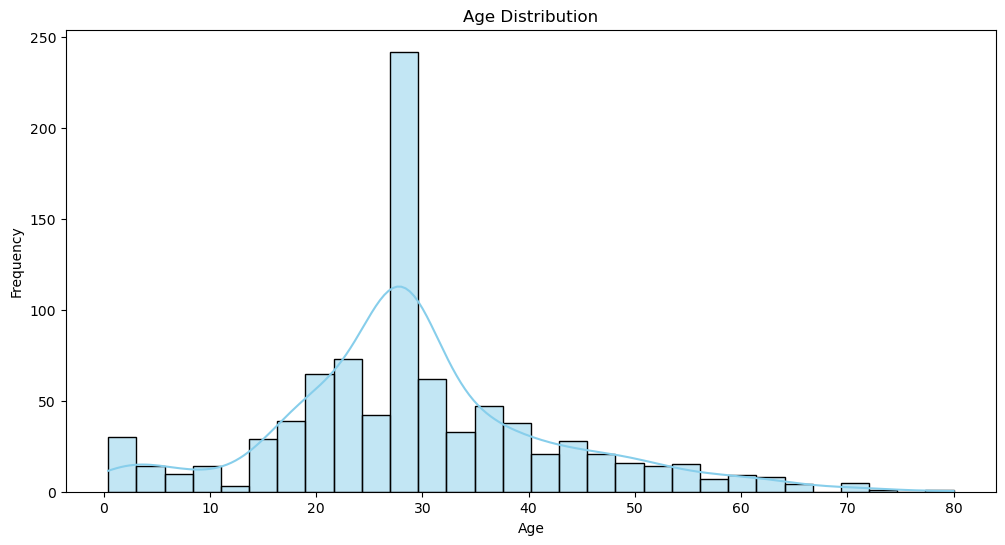

In [12]:
# Step 5: Exploratory Data Analysis (EDA)

# Basic Summary Statistics
print(data.describe())

# Visualize the distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(data['Age'], kde=True, color='skyblue', bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


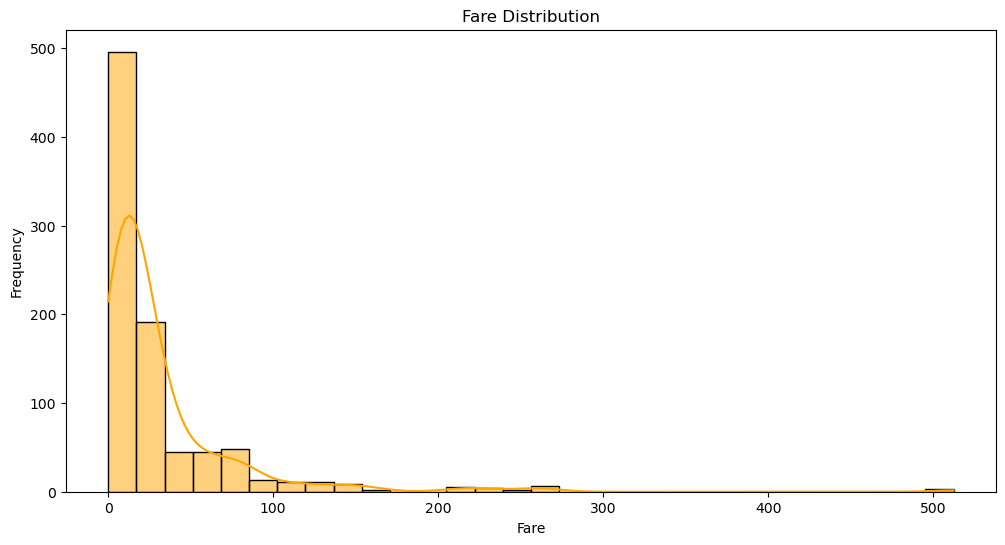

In [13]:
# Visualize the distribution of Fare
plt.figure(figsize=(12, 6))
sns.histplot(data['Fare'], kde=True, color='orange', bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


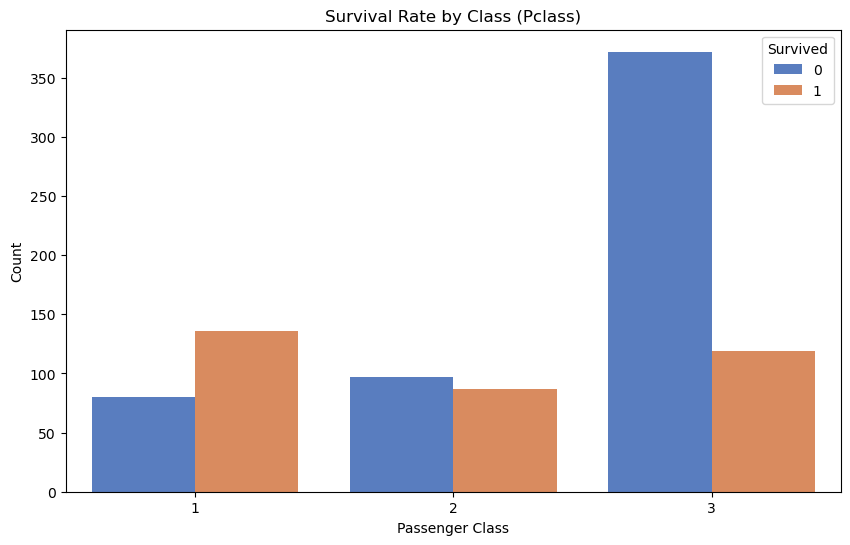

In [14]:
# Survival rate by Class (Pclass)
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=data, palette='muted')
plt.title('Survival Rate by Class (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


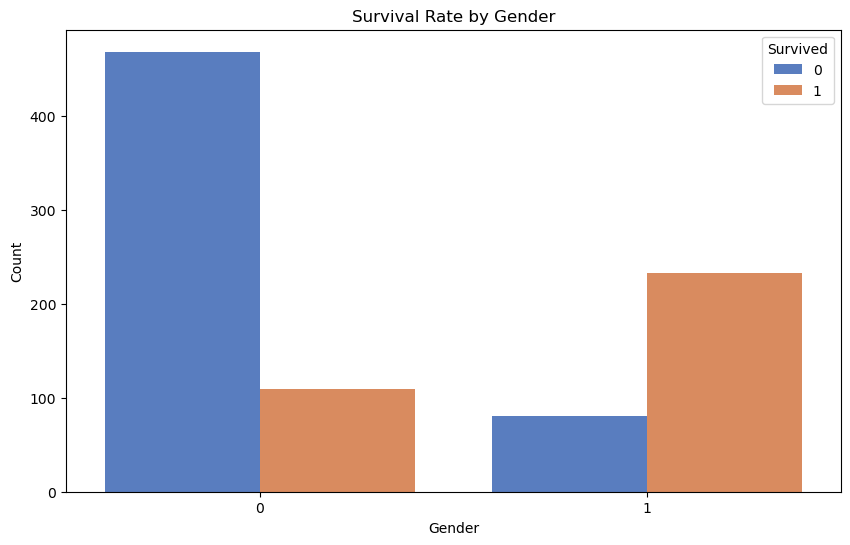

In [15]:
# Survival rate by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=data, palette='muted')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

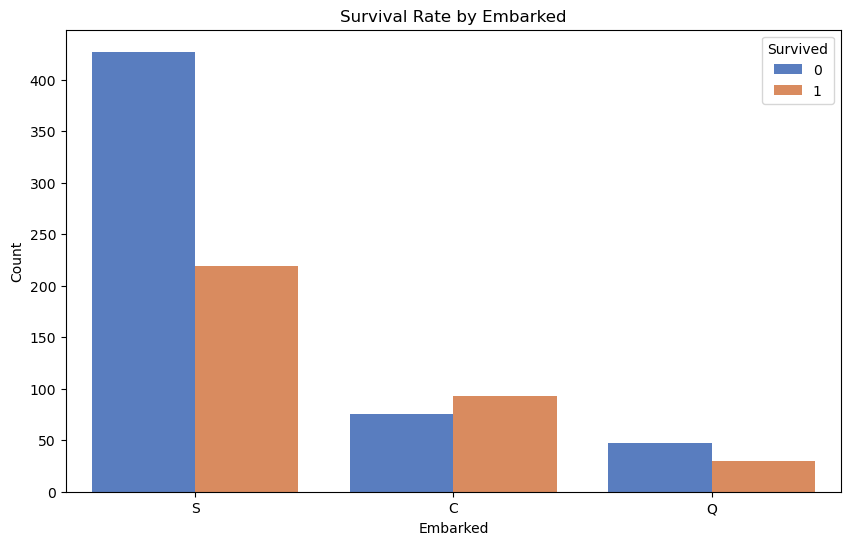

In [16]:
# Survival rate by Embarked (Port of Embarkation)
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=data, palette='muted')
plt.title('Survival Rate by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

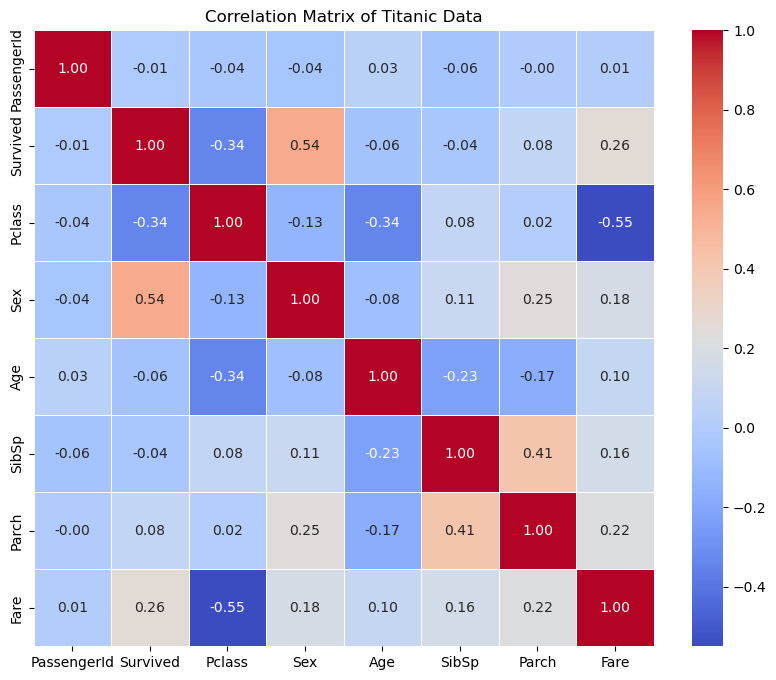

In [19]:
#Correlation Matrix for numerical variables
numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Titanic Data')
plt.show()


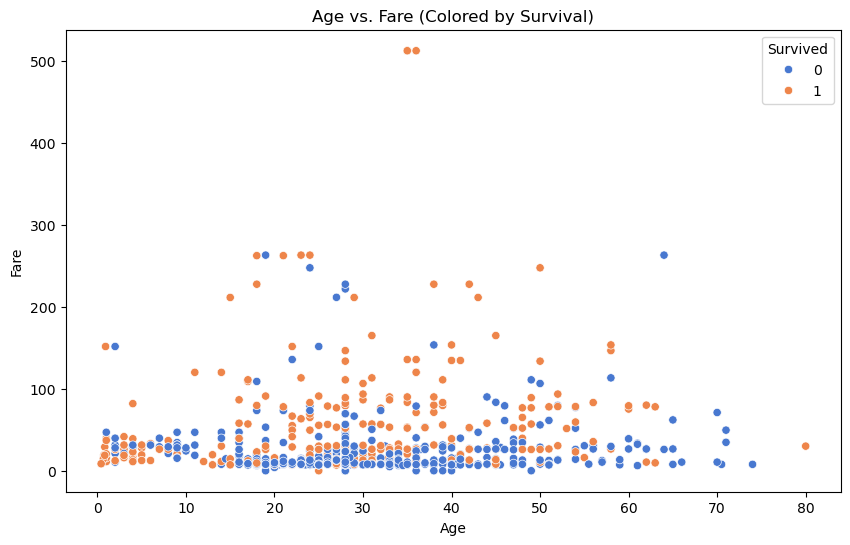

In [20]:
# Age vs. Fare Scatter plot (Colored by Survival)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data, palette='muted')
plt.title('Age vs. Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [21]:
# Step 6: Identify Patterns & Trends
# Overall survival rate
survival_rate = data['Survived'].mean()
print(f"Overall survival rate: {survival_rate * 100:.2f}%")

# Survival rate by Class
survival_by_class = data.groupby('Pclass')['Survived'].mean()
print(f"Survival rate by Class:\n{survival_by_class}")

# Survival rate by Gender
survival_by_gender = data.groupby('Sex')['Survived'].mean()
print(f"Survival rate by Gender:\n{survival_by_gender}")

# Survival rate by Age group
age_bins = [0, 18, 30, 50, 100]  # Define age groups
age_labels = ['0-18', '19-30', '31-50', '51+']
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

survival_by_age_group = data.groupby('AgeGroup')['Survived'].mean()
print(f"Survival rate by Age Group:\n{survival_by_age_group}")

Overall survival rate: 38.38%
Survival rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Survival rate by Gender:
Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64
Survival rate by Age Group:
AgeGroup
0-18     0.503597
19-30    0.331096
31-50    0.423237
51+      0.343750
Name: Survived, dtype: float64


/var/folders/1p/kgw_81px61jcrqrrnfwt7tq40000gn/T/ipykernel_2643/2920385273.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age_group = data.groupby('AgeGroup')['Survived'].mean()


#Step 7: Conclusion and Insights
#Insights on patterns:

1.he survival rate is higher for women compared to men.

2.Passengers in higher classes (Pclass 1) had a higher survival rate.

3.The survival rate was higher for passengers embarking at Cherbourg.

4.Young adults had the least survival rate, indicating that age played a role in survival outcomes. This could be attributed to the "women and children first" policy, where younger individuals were given priority during the evacuation.

5.The variables fare, sex, passenger class (Pclass), and embarkation point (Embarked) show correlations with the survival outcome. This reinforces the importance of these factors in determining survival chances during the Titanic disaster.

